## Solución del problema

### 1.Instalación e importación de librerias

In [113]:
"""# Manejo de gráficas
!pip install scikit-plot
# Manejo de gráficas
!pip install scikit-plot
#Manejo de lemmatization spanish
!pip install stanza
"""

'# Manejo de gráficas\n!pip install scikit-plot\n# Manejo de gráficas\n!pip install scikit-plot\n#Manejo de lemmatization spanish\n!pip install stanza\n'

In [114]:
# librería Natural Language Toolkit, usada para trabajar con textos
import nltk
"""# Punkt permite separar un texto en frases.
nltk.download('punkt')"""
# Punkt permite separar un texto en frases.
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ascas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [115]:
#El lemmatizer de NLTK NO funciona en español, por lo que se usará el de Stanza
# Descarga de paquete WordNetLemmatizer, este es usado para encontrar el lema de cada palabra
# ¿Qué es el lema de una palabra? ¿Qué tan dificil puede ser obtenerlo, piensa en el caso en que tuvieras que escribir la función que realiza esta tarea?
#nltk.download('wordnet')
import stanza
stanza.download('es') # descarga el modelo de lematización en español


2024-04-05 09:18:59 INFO: Downloaded file to C:\Users\ascas\stanza_resources\resources.json
2024-04-05 09:18:59 INFO: Downloading default packages for language: es (Spanish) ...
2024-04-05 09:19:01 INFO: File exists: C:\Users\ascas\stanza_resources\es\default.zip
2024-04-05 09:19:06 INFO: Finished downloading models and saved to C:\Users\ascas\stanza_resources


In [116]:
nlp = stanza.Pipeline(lang='es', processors='tokenize,mwt,pos,lemma')

2024-04-05 09:19:06 INFO: Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


2024-04-05 09:19:07 INFO: Downloaded file to C:\Users\ascas\stanza_resources\resources.json
2024-04-05 09:19:07 INFO: Loading these models for language: es (Spanish):
| Processor | Package         |
-------------------------------
| tokenize  | ancora          |
| mwt       | ancora          |
| pos       | ancora_charlm   |
| lemma     | ancora_nocharlm |

2024-04-05 09:19:07 INFO: Using device: cpu
2024-04-05 09:19:07 INFO: Loading: tokenize
2024-04-05 09:19:07 INFO: Loading: mwt
2024-04-05 09:19:07 INFO: Loading: pos
2024-04-05 09:19:08 INFO: Loading: lemma
2024-04-05 09:19:08 INFO: Done loading processors!


In [117]:
# Instalación de librerias
import pandas as pd
import numpy as np
import sys

#Usados en el proyecto 1
from nltk.tokenize import WordPunctTokenizer 
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer



######################################



#!{sys.executable} -m pip install pandas-profiling

import re, string, unicodedata

#from nltk import word_tokenize, sent_tokenize


from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, accuracy_score

from sklearn.base import BaseEstimator, ClassifierMixin

import matplotlib.pyplot as plt

### 2. Perfilamiento y entendimiento de los datos

#### 2.1 Lectura de los Datos

In [118]:
# Uso de la libreria pandas para la lectura de archivos
data=pd.read_csv('train_reviews.csv', sep=',', encoding = 'utf-8')
# Asignación a una nueva variable de los datos leidos
data_train=data

In [119]:
data_train

,Review,Class
0,Muy buena atención y aclaración de dudas por p...,5
1,Buen hotel si están obligados a estar cerca de...,3
2,"Es un lugar muy lindo para fotografías, visite...",5
3,Abusados con la factura de alimentos siempre s...,3
4,Tuvimos un par de personas en el grupo que rea...,3
...,...,...
7870,"Me parece buen sistema, agiliza el transporte,...",4
7871,"Fue una escapada de un día desde el complejo, ...",4
7872,La Plaza de la Revolución es un lugar emblemát...,3
7873,Es la segunda ocasión que me quedo en los cuar...,1


In [120]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7875 entries, 0 to 7874
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  7875 non-null   object
 1   Class   7875 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 123.2+ KB


## 2.2 Entendimiento de los datos

In [121]:
from scipy import stats as st

textos = data_train.copy()
textos['Conteo'] = [len(x) for x in textos['Review']]

#Por ahora: La moda no da información relevante
"""def moda(textos):
    for i in textos['Review']: 
        dict = {}
        for x in i.split(' '): 
            print(i)
        
            if x in dict.keys():
                dict[x] += 1
            else:
                dict[x] = 1

        max_key = max(dict, key=dict.get)
        print(max_key)


moda(textos)
"""
#textos['Moda'] =
#Max tiene el máximo tamaño de la palabra
textos['Max'] = [[max([len(x) for x in i.split(' ')])][0] for i in textos['Review']]
#Max tiene el minimo tamaño de la palabra
textos['Min'] = [[min([len(x) for x in i.split(' ')])][0] for i in textos['Review']]




def frecuenciaPalabras(texto):
    frecuenciaPalabras = {}

    for i in texto: 
        for x in i.split(' '): 
            if x in frecuenciaPalabras.keys():
                frecuenciaPalabras[x] += 1
            else:
                frecuenciaPalabras[x] = 1

    print(frecuenciaPalabras)
    return frecuenciaPalabras



In [122]:
dictFrec = frecuenciaPalabras(textos['Review'])

df_Frecuencias = pd.DataFrame.from_dict(dictFrec, orient='index', columns=['frecuencia'])

df_Frecuencias['palabra'] = df_Frecuencias.index
df_Frecuencias.reset_index(drop=True,inplace=True)


df_Frecuencias['palabra']=[unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore') for word in df_Frecuencias['palabra']]

{'Muy': 461, 'buena': 958, 'atención': 602, 'y': 18843, 'aclaración': 1, 'de': 25036, 'dudas': 31, 'por': 4448, 'parte': 527, 'la': 17275, 'señorita': 30, 'Verónica': 1, 'castillo,': 21, 'atenta': 19, 'amable': 258, 'en': 13617, 'cuestión': 27, 'laborable.': 1, '': 3487, 'Ideal': 17, 'para': 6006, 'descansar': 56, 'muy': 5850, 'buenas': 197, 'habitaciónes,': 1, 'limpieza,': 40, 'ordenadas.': 1, 'Buena': 86, 'comida': 1761, 'del': 4051, 'restaurante,variedad': 1, 'comidas': 87, 'Buen': 89, 'hotel': 2641, 'si': 1558, 'están': 534, 'obligados': 5, 'a': 8410, 'estar': 359, 'cerca': 338, 'centro': 398, 'convenciones,': 3, 'pero': 3398, 'el': 13145, 'restaurante': 804, 'necesita': 86, 'mejorar!': 1, 'Frío': 1, 'café': 140, 'flojo': 6, '-': 548, 'un': 8052, 'montón': 246, 'pan': 51, 'personas': 435, 'que': 15619, 'sirve': 60, 'unos': 373, 'uderstanding': 1, 'bu': 1, 'lo': 3650, 'significa': 22, 'servicio.': 127, 'En': 717, 'este': 1612, 'barrio': 43, 'con': 5311, 'tan': 509, 'pocas': 78, 'opc

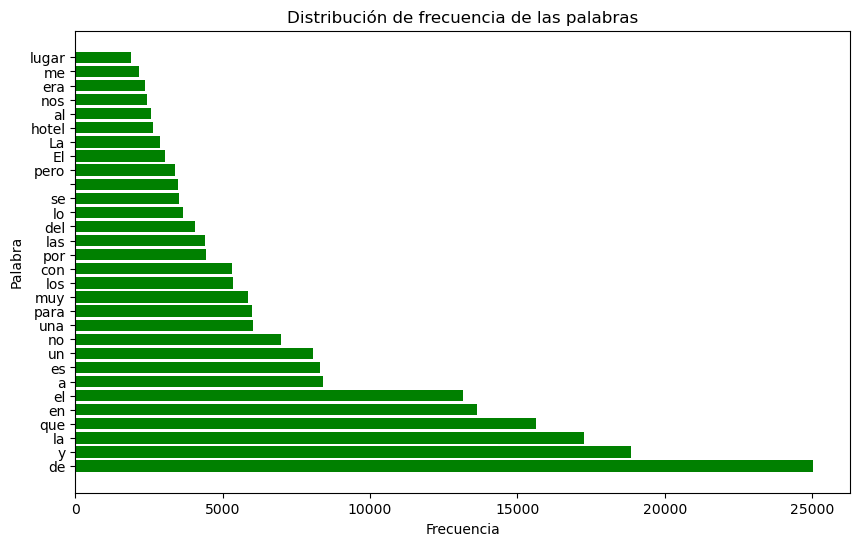

In [123]:
sortedFirst = df_Frecuencias.copy().sort_values(by=['frecuencia'], ascending=False).head(30)



fig = plt.figure(figsize=(10, 6))
plt.barh(sortedFirst['palabra'], sortedFirst['frecuencia'], color='green')
plt.xlabel('Frecuencia')
plt.ylabel('Palabra')
plt.title('Distribución de frecuencia de las palabras')
plt.show()

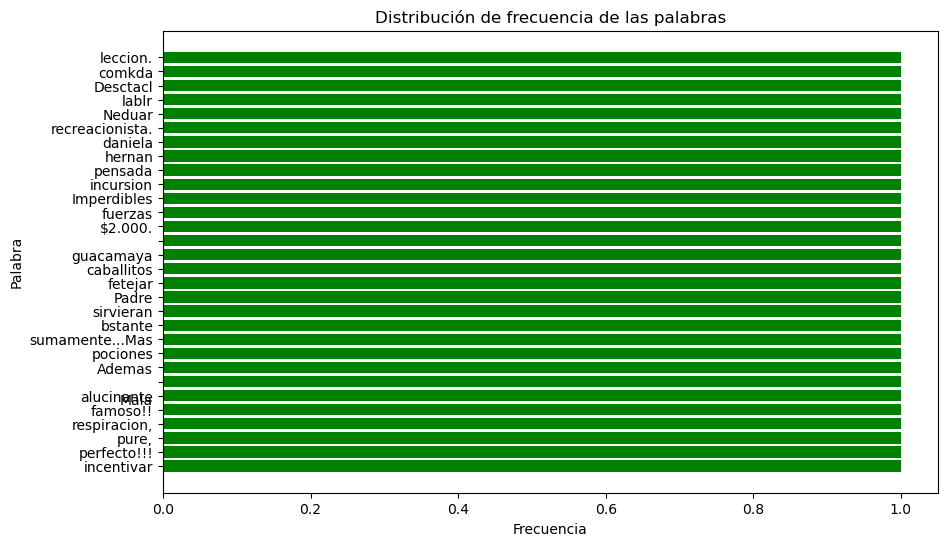

In [124]:
sortedLast= df_Frecuencias.copy().sort_values(by=['frecuencia'], ascending=False).tail(30)

fig2 = plt.figure(figsize=(10, 6))
plt.barh(sortedLast['palabra'], sortedLast['frecuencia'], color='green')
plt.xlabel('Frecuencia')
plt.ylabel('Palabra')
plt.title('Distribución de frecuencia de las palabras')
plt.show()

In [125]:
textos

,Review,Class,Conteo,Max,Min
0,Muy buena atención y aclaración de dudas por p...,5,252,20,0
1,Buen hotel si están obligados a estar cerca de...,3,297,13,1
2,"Es un lugar muy lindo para fotografías, visite...",5,104,12,1
3,Abusados con la factura de alimentos siempre s...,3,422,14,1
4,Tuvimos un par de personas en el grupo que rea...,3,419,14,1
...,...,...,...,...,...
7870,"Me parece buen sistema, agiliza el transporte,...",4,113,11,2
7871,"Fue una escapada de un día desde el complejo, ...",4,261,12,2
7872,La Plaza de la Revolución es un lugar emblemát...,3,777,14,1
7873,Es la segunda ocasión que me quedo en los cuar...,1,651,12,0


In [126]:
"""import ydata_profiling
from ydata_profiling import ProfileReport
ProfileReport(textos)"""

'import ydata_profiling\nfrom ydata_profiling import ProfileReport\nProfileReport(textos)'

### 2.3 Preparación de los datos

#### 2.3.1 Limpieza de los datos

##### 2.3.1.1 Duplicados

In [127]:
textos.duplicated(keep = False).sum()

102

In [128]:
textos.drop_duplicates(keep='first', inplace=True)
textos.duplicated(keep = False).sum()

0

In [129]:
#Quitar los números
print(textos['Review'][1201])
textos['Review'] = textos['Review'].replace(r'\d+,\d+', '', regex=True)
textos['Review'] = textos['Review'].replace(r'\d+', '', regex=True)
textos['Review'] = textos['Review'].replace(r'\d+.\d+', '', regex=True)
print(textos['Review'][1201])

El día lunes 17 de setiembre 2012 visite con mi familia Monserratte y debía pagar un taxi, por lo que a las 12 M.D, fui a la taquilla para cambiar 50,000 pesos y poder pagar mi taxi. Mi sorpresa al pagar el taxi fue que le entregue los 50,000 al empleado en la taquilla y me estafó, me dió un billete de 20,000 encima y debajo venia uno de 2,000 y luego el otro de 1,000.  El funcionario de la taquilla me estafó con el cambio y se dejó 27,000 pesos. Es bueno que sepan que tienen un ladrón trabajando en sus instalaciones y así como fui estafado yo, me imagino que también otros Turistas pasan por lo mismo. Revise muy bien su cambio en la ventanilla porque le pordría pasar lo mismo.
El día lunes  de setiembre  visite con mi familia Monserratte y debía pagar un taxi, por lo que a las  M.D, fui a la taquilla para cambiar  pesos y poder pagar mi taxi. Mi sorpresa al pagar el taxi fue que le entregue los  al empleado en la taquilla y me estafó, me dió un billete de  encima y debajo venia uno de 

In [130]:
spanish_stopwords = stopwords.words('spanish')
print(spanish_stopwords)

def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        if word is not None:
          new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
          new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_words.append(word.lower())
    return new_words
    

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        if word is not None:
            new_word = re.sub(r'[^\w\s]', '', word)
            if new_word != '':
                new_words.append(new_word)
    return new_words

#def replace_numbers(words):
#    """Replace all interger occurrences in list of tokenized words with textual representation"""
#    p = inflect.engine()
#    print(words)
#    new_words = []
#    for word in words:
#        if word.isdigit():
#            new_word = p.number_to_words(word)
#            new_words.append(new_word)
#            print("if " + new_word)
#        else:
#            new_words.append(word)
#    return new_words

def remove_stopwords(words):
    new_words = []
    for word in words:
        if word not in spanish_stopwords:
            new_words.append(word)
    return new_words

def preprocessing(words):
    words = to_lowercase(words)
 #   words = replace_numbers(words)
    words = remove_punctuation(words)
#    words = remove_non_ascii(words)
    words = remove_stopwords(words)
    return words

def getString(list): 
    string = ""
    for w in list: 
        string += w + " "
    return string



def softPreprocessing(words):
    words = to_lowercase(words)
    words = remove_non_ascii(words)
    getString(words)
    return getString(words)

['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'ni', 'contra', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mí', 'antes', 'algunos', 'qué', 'unos', 'yo', 'otro', 'otras', 'otra', 'él', 'tanto', 'esa', 'estos', 'mucho', 'quienes', 'nada', 'muchos', 'cual', 'poco', 'ella', 'estar', 'estas', 'algunas', 'algo', 'nosotros', 'mi', 'mis', 'tú', 'te', 'ti', 'tu', 'tus', 'ellas', 'nosotras', 'vosotros', 'vosotras', 'os', 'mío', 'mía', 'míos', 'mías', 'tuyo', 'tuya', 'tuyos', 'tuyas', 'suyo', 'suya', 'suyos', 'suyas', 'nuestro', 'nuestra', 'nuestros', 'nuestras', 'vuestro', 'vuestra', 'vuestros', 'vuestras', 'esos', 'esas', 'estoy', 'estás', 'está', 'estamos', 'estáis', 'están', 'e

In [131]:
textos['tokens'] = [i.split(' ') for i in textos['Review']]
textos['tokens'] = textos['tokens'].apply(softPreprocessing)

textos.iloc[1201]['tokens']

'lugar especial para un atardecer o para conocer como son los cubanos y cubanas, autentico y romantico. inicio y fin de muchas cosas: el amor, la aventura, la ciudad y el mar. '

In [132]:
"""def lemmatizer(row):

    review= row['tokens']
    
    print(row.name)
    doc  =  nlp(review)
    #print (review)
    lemma = [[word.lemma for word in sent.words]  for sent in doc.sentences]
    finalLemma =[]
    for sent in lemma:
        for word in sent:  
            finalLemma.append(word)
    #print(finalLemma)

    return finalLemma


textos['tokens']= textos.apply(lemmatizer,axis=1) #Aplica la lematización

#Codigo para guardar los lemas en csv
textos.to_csv('lemaSoftProcessing.csv')"""

"def lemmatizer(row):\n\n    review= row['tokens']\n    \n    print(row.name)\n    doc  =  nlp(review)\n    #print (review)\n    lemma = [[word.lemma for word in sent.words]  for sent in doc.sentences]\n    finalLemma =[]\n    for sent in lemma:\n        for word in sent:  \n            finalLemma.append(word)\n    #print(finalLemma)\n\n    return finalLemma\n\n\ntextos['tokens']= textos.apply(lemmatizer,axis=1) #Aplica la lematización\n\n#Codigo para guardar los lemas en csv\ntextos.to_csv('lemaSoftProcessing.csv')"

Recursos utilizados: 
https://medium.com/escueladeinteligenciaartificial/procesamiento-de-lenguaje-natural-stemming-y-lemmas-f5efd90dca8
https://neptune.ai/blog/vectorization-techniques-in-nlp-guide
https://gitlab.virtual.uniandes.edu.co/ISIS3301/practicas/blob/master/ProcesamientoTextos/Preparaci%C3%B3n_de_textos_estudiante.ipynb


#### 2.3.2 Tokenización

Se utiliza WordPunctTokenizer dado que el idioma español no presenta contracciones y este Tokenizer es más robusto frente a los signos de puntuación. 

In [133]:

from ast import literal_eval
textosLemas = pd.read_csv('lemaSoftProcessing.csv', sep=',', encoding = 'utf-8')
textosLemas.iloc[1201]
textosLemas['tokens'] = textosLemas['tokens'].apply(literal_eval)
print(textosLemas['tokens'][1201])
"""print(textos.iloc[1201]['tokens'])

print(textos.iloc[1201]['tokens'])"""
def getString(list): 

    string = ""
    for w in list: 
        
        string += w + " "
    #print(string)
    return string
textosLemas['tokens'] = textosLemas['tokens'].apply(getString)
print(textosLemas['tokens'])
textosLemas['tokens'] = [ WordPunctTokenizer().tokenize(i) for i in textosLemas['tokens']]
    
textosLemas['tokens'].iloc[1201]

['lugar', 'especial', 'para', 'uno', 'atardecer', 'o', 'para', 'conocer', 'como', 'ser', 'el', 'cubano', 'y', 'cubano', ',', 'autentico', 'y', 'romantico', '.', 'inicio', 'y', 'fin', 'de', 'mucho', 'cosa', ':', 'el', 'amor', ',', 'el', 'aventura', ',', 'el', 'ciudad', 'y', 'el', 'mar', '.']
0       mucho buen atencion y aclaracion de duda por p...
1       buen hotel si estar obligado a estar cerca de ...
2       ser uno lugar mucho lindo para fotografia , vi...
3       abusado con el factura de alimento siempre él ...
4       tener uno par de persona en el grupo que realm...
                              ...                        
7797    yo parecer buen sistema , agilizar el transpor...
7798    ser uno escapada de uno dia desde el complejo ...
7799    el plaza de el revolucion ser uno lugar emblem...
7800    ser el segundo ocasion que yo quedar en el cua...
7801    llegar por casualidad a el mercader , uno grup...
Name: tokens, Length: 7802, dtype: object


['lugar',
 'especial',
 'para',
 'uno',
 'atardecer',
 'o',
 'para',
 'conocer',
 'como',
 'ser',
 'el',
 'cubano',
 'y',
 'cubano',
 ',',
 'autentico',
 'y',
 'romantico',
 '.',
 'inicio',
 'y',
 'fin',
 'de',
 'mucho',
 'cosa',
 ':',
 'el',
 'amor',
 ',',
 'el',
 'aventura',
 ',',
 'el',
 'ciudad',
 'y',
 'el',
 'mar',
 '.']

In [134]:
textosLemas['tokens'].dropna()

0       [mucho, buen, atencion, y, aclaracion, de, dud...
1       [buen, hotel, si, estar, obligado, a, estar, c...
2       [ser, uno, lugar, mucho, lindo, para, fotograf...
3       [abusado, con, el, factura, de, alimento, siem...
4       [tener, uno, par, de, persona, en, el, grupo, ...
                              ...                        
7797    [yo, parecer, buen, sistema, ,, agilizar, el, ...
7798    [ser, uno, escapada, de, uno, dia, desde, el, ...
7799    [el, plaza, de, el, revolucion, ser, uno, luga...
7800    [ser, el, segundo, ocasion, que, yo, quedar, e...
7801    [llegar, por, casualidad, a, el, mercader, ,, ...
Name: tokens, Length: 7802, dtype: object

#### 2.3.2 Eliminación de ruido
Esta eliminación del ruido implica eliminar aquello asociado a mayusculas, eliminación de puntuación y de elementos NO ascci 

In [135]:
textosLemas['tokens']=textosLemas['tokens'].apply(preprocessing) #Aplica la eliminación del ruido

textosLemas.head()

,Unnamed: 0,Review,Class,Conteo,Max,Min,tokens
0,0,Muy buena atención y aclaración de dudas por p...,5,252,20,0,"[buen, atencion, aclaracion, duda, parte, seno..."
1,1,Buen hotel si están obligados a estar cerca de...,3,297,13,1,"[buen, hotel, si, obligado, cerca, centro, con..."
2,2,"Es un lugar muy lindo para fotografías, visite...",5,104,12,1,"[ser, lugar, lindo, fotografia, visitar, selin..."
3,3,Abusados con la factura de alimentos siempre s...,3,422,14,1,"[abusado, factura, alimento, siempre, echar, c..."
4,4,Tuvimos un par de personas en el grupo que rea...,3,419,14,1,"[tener, par, persona, grupo, realmente, querer..."


In [136]:
textosLemas['tokens'] = textosLemas['tokens'].apply(lambda x: ' '.join(map(str, x)))
textosLemas.head()

,Unnamed: 0,Review,Class,Conteo,Max,Min,tokens
0,0,Muy buena atención y aclaración de dudas por p...,5,252,20,0,buen atencion aclaracion duda parte senorita v...
1,1,Buen hotel si están obligados a estar cerca de...,3,297,13,1,buen hotel si obligado cerca centro convención...
2,2,"Es un lugar muy lindo para fotografías, visite...",5,104,12,1,ser lugar lindo fotografia visitar selina musi...
3,3,Abusados con la factura de alimentos siempre s...,3,422,14,1,abusado factura alimento siempre echar culpa i...
4,4,Tuvimos un par de personas en el grupo que rea...,3,419,14,1,tener par persona grupo realmente querer comer...


#### 2.3.3 Normalización
El stemming se opata por hacer a traves del método SnowballStemmer el cual esta enfocado hacia el idioma español

In [137]:
"""stemmer = SnowballStemmer('spanish')

textos['tokens'] =  [ [stemmer.stem(word) for word in tokens] for tokens in textos['tokens']]
i = 1201
print(textos['tokens'][i])
print(textos['Review'][i])"""

"stemmer = SnowballStemmer('spanish')\n\ntextos['tokens'] =  [ [stemmer.stem(word) for word in tokens] for tokens in textos['tokens']]\ni = 1201\nprint(textos['tokens'][i])\nprint(textos['Review'][i])"

In [138]:
"""def lemmatizer(row):

    review= row['tokens']
    
    print(row.name)
    doc  =  nlp(review)
    #print (review)
    lemma = [[word.lemma for word in sent.words]  for sent in doc.sentences]
    finalLemma =[]
    for sent in lemma:
        for word in sent:  
            finalLemma.append(word)
    #print(finalLemma)

    return finalLemma


textos['tokens']= textos.apply(lemmatizer,axis=1) #Aplica la lematización
"""

"def lemmatizer(row):\n\n    review= row['tokens']\n    \n    print(row.name)\n    doc  =  nlp(review)\n    #print (review)\n    lemma = [[word.lemma for word in sent.words]  for sent in doc.sentences]\n    finalLemma =[]\n    for sent in lemma:\n        for word in sent:  \n            finalLemma.append(word)\n    #print(finalLemma)\n\n    return finalLemma\n\n\ntextos['tokens']= textos.apply(lemmatizer,axis=1) #Aplica la lematización\n"

In [139]:
"""def oneSentence(list):
    complete = []
    for sent in list:
        for word in sent:
            complete.append(word)

    return complete

textos['tokens'] = [oneSentence(i) for i in textos['tokens']]"""

"def oneSentence(list):\n    complete = []\n    for sent in list:\n        for word in sent:\n            complete.append(word)\n\n    return complete\n\ntextos['tokens'] = [oneSentence(i) for i in textos['tokens']]"

Este análisis se demora bastante en ejecutar, por lo que se decide guardar estos tokens en un archivo csv intermedio 

In [140]:
"""#Codigo para guardar los lemas en csv
textos.to_csv('lemaSinStopWords.csv')"""

"#Codigo para guardar los lemas en csv\ntextos.to_csv('lemaSinStopWords.csv')"

Ahora se leen estos tokens ya con Lemmatization del archivo csv y se continua usando como el conjunto de tokens real

In [141]:
"""#Leer archivo previamente guardado de lemas
from ast import literal_eval
textosLemas = pd.read_csv('lemaSinStopWords.csv', sep=',', encoding = 'utf-8')
textosLemas['tokens'] = textosLemas['tokens'].apply(literal_eval)
"""

"#Leer archivo previamente guardado de lemas\nfrom ast import literal_eval\ntextosLemas = pd.read_csv('lemaSinStopWords.csv', sep=',', encoding = 'utf-8')\ntextosLemas['tokens'] = textosLemas['tokens'].apply(literal_eval)\n"

In [142]:
"""textosLemas['tokens']=textosLemas['tokens'].apply(preprocessing) #Aplica la eliminación del ruido"""

"textosLemas['tokens']=textosLemas['tokens'].apply(preprocessing) #Aplica la eliminación del ruido"

#### 2.3.4 Selección de campos 
-> Separación palabras ( tokens) y categoria 

In [143]:
textosLemas.head()

,Unnamed: 0,Review,Class,Conteo,Max,Min,tokens
0,0,Muy buena atención y aclaración de dudas por p...,5,252,20,0,buen atencion aclaracion duda parte senorita v...
1,1,Buen hotel si están obligados a estar cerca de...,3,297,13,1,buen hotel si obligado cerca centro convención...
2,2,"Es un lugar muy lindo para fotografías, visite...",5,104,12,1,ser lugar lindo fotografia visitar selina musi...
3,3,Abusados con la factura de alimentos siempre s...,3,422,14,1,abusado factura alimento siempre echar culpa i...
4,4,Tuvimos un par de personas en el grupo que rea...,3,419,14,1,tener par persona grupo realmente querer comer...


In [144]:
"""textosLemas['tokens'] = textosLemas['tokens'].apply(lambda x: ' '.join(map(str, x)))
textosLemas.head()"""

"textosLemas['tokens'] = textosLemas['tokens'].apply(lambda x: ' '.join(map(str, x)))\ntextosLemas.head()"

## Division en conjuntos train y test y validacion

In [145]:
x_train, x_test = train_test_split(textosLemas, test_size=0.45, random_state=1) 
print(x_train.shape, x_test.shape)
x_train_completo = x_train
x_train, x_val = train_test_split(x_train, test_size=0.25, random_state=1)

print( x_test.shape,x_train.shape, x_val.shape)


(4291, 7) (3511, 7)
(3511, 7) (3218, 7) (1073, 7)


# Segundo profile tras aplicación de preprocessing

In [146]:
"""import ydata_profiling
from ydata_profiling import ProfileReport
ProfileReport(textosLemas)"""

'import ydata_profiling\nfrom ydata_profiling import ProfileReport\nProfileReport(textosLemas)'

In [147]:


dictFrecuenciasTokenizado = frecuenciaPalabras(textosLemas['tokens'])

df_Frecuencias = pd.DataFrame.from_dict(dictFrecuenciasTokenizado, orient='index', columns=['frecuencia'])

df_Frecuencias['palabra'] = df_Frecuencias.index
df_Frecuencias.reset_index(drop=True,inplace=True)


df_Frecuencias['palabra']=[unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore') for word in df_Frecuencias['palabra']]

{'buen': 3514, 'atencion': 869, 'aclaracion': 2, 'duda': 363, 'parte': 632, 'senorita': 32, 'veronico': 1, 'castillo': 125, 'atento': 316, 'amable': 597, 'cuestion': 33, 'laborable': 1, 'ideal': 98, 'descansar': 108, 'habitación': 1151, 'limpieza': 263, 'ordenado': 37, 'comida': 2266, 'restaurante': 1586, 'variedad': 225, 'hotel': 3970, 'si': 2437, 'obligado': 154, 'cerca': 411, 'centro': 494, 'convención': 13, 'necesitar': 287, 'mejorar': 175, 'frio': 143, 'cafe': 264, 'flojo': 13, 'monton': 251, 'pan': 66, 'persona': 736, 'servir': 270, 'uderstanding': 1, 'bu': 1, 'significar': 41, 'servicio': 2204, 'barrio': 66, 'opción': 187, 'deber': 700, 'ser': 17667, 'especial': 274, 'lugar': 2755, 'lindo': 298, 'fotografia': 65, 'visitar': 920, 'selina': 2, 'musica': 338, 'vivo': 118, 'cerveza': 92, 'artesanal': 21, 'abusado': 1, 'factura': 79, 'alimento': 195, 'siempre': 537, 'echar': 39, 'culpa': 12, 'ir': 2399, 'buscar': 199, 'rfc': 1, 'proporcionar': 60, 'independisar': 1, 'base': 38, 'tene

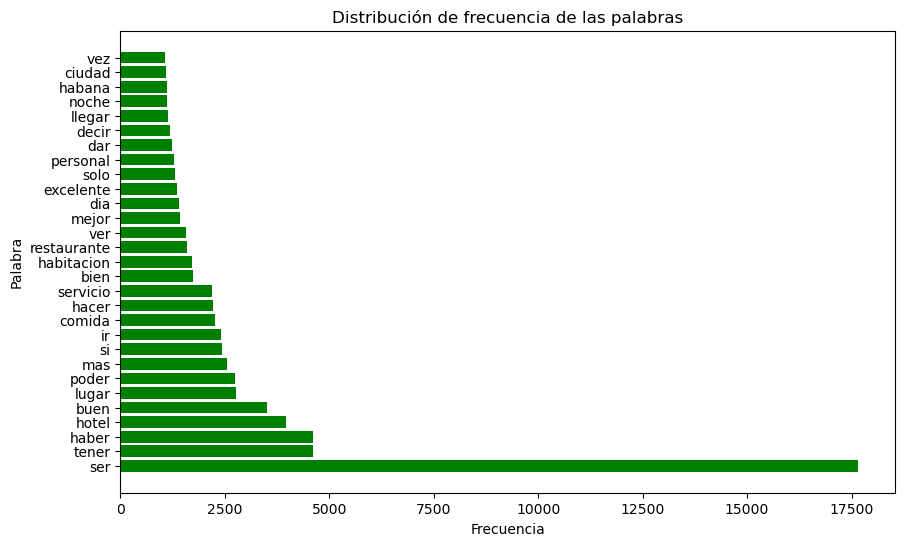

In [148]:
sortedFirst = df_Frecuencias.copy().sort_values(by=['frecuencia'], ascending=False).head(30)



fig = plt.figure(figsize=(10, 6))
plt.barh(sortedFirst['palabra'], sortedFirst['frecuencia'], color='green')
plt.xlabel('Frecuencia')
plt.ylabel('Palabra')
plt.title('Distribución de frecuencia de las palabras')
plt.show()

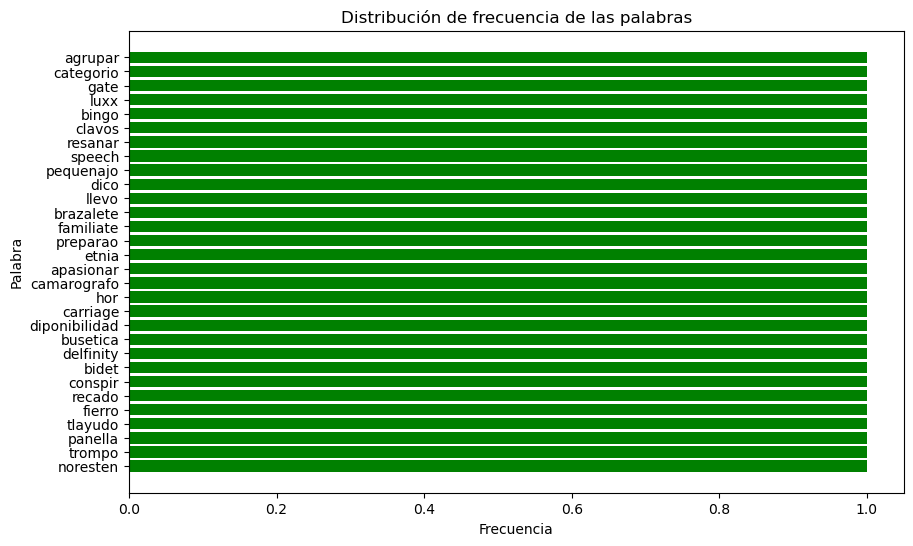

In [149]:
sortedLast= df_Frecuencias.copy().sort_values(by=['frecuencia'], ascending=False).tail(30)

fig2 = plt.figure(figsize=(10, 6))
plt.barh(sortedLast['palabra'], sortedLast['frecuencia'], color='green')
plt.xlabel('Frecuencia')
plt.ylabel('Palabra')
plt.title('Distribución de frecuencia de las palabras')
plt.show()

Analisis corto de lo que sucede tras el preprocessing, palabras más relevantes etc...
**TO DO

In [150]:
x_train_completo, y_train_completo = x_train_completo['tokens'],x_train_completo['Class']
x_train, y_train = x_train['tokens'],x_train['Class']
x_val, y_val = x_val['tokens'],x_val['Class']
x_test, y_test = x_test['tokens'],x_test['Class']

## 3. Embedding del texto: 
Transformación del texto en formato para la máquina

#### 3.1 Count Vectorizer
Utilización del conteo de palabras presentes como Vectorizer -> No creo que sea tan bueno

In [151]:
count = CountVectorizer()
x_train_complete_countVectorizer = count.fit_transform(x_train_completo)
print(x_train_complete_countVectorizer.shape)
x_train_complete_countVectorizer.toarray()[3]

x_train_countVectorizer = count.transform(x_train)
print(x_train_countVectorizer.shape)
x_train_countVectorizer.toarray()[3]


x_val_countVectorizer = count.transform(x_val)
print(x_val_countVectorizer.shape)
x_val_countVectorizer.toarray()[3]


x_test_countVectorizer = count.transform(x_test)
print(x_test_countVectorizer.shape)
x_test_countVectorizer.toarray()[3]

(4291, 11446)
(3218, 11446)
(1073, 11446)
(3511, 11446)


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

#### 3.1 TfiDf

In [152]:
tfidf = TfidfVectorizer()
x_train_completo_tfidfVectorizer = tfidf.fit_transform(x_train_completo)
print(x_train_completo_tfidfVectorizer.shape)
x_train_completo_tfidfVectorizer.toarray()[3]

df_train = pd.DataFrame(x_train_completo_tfidfVectorizer[0].T.todense(),
    	index=tfidf.get_feature_names_out(), columns=["TF-IDF"])
df_train = df_train.sort_values('TF-IDF', ascending=False)
#print(df_train.head(20))



x_train_tfidfVectorizer = tfidf.transform(x_train)
print(x_train_tfidfVectorizer.shape)
x_train_tfidfVectorizer.toarray()[3]

df_train = pd.DataFrame(x_train_tfidfVectorizer[0].T.todense(),
    	index=tfidf.get_feature_names_out(), columns=["TF-IDF"])
df_train = df_train.sort_values('TF-IDF', ascending=False)
#print(df_train.head(20))

x_test_tfidfVectorizer = tfidf.transform(x_test)
print(x_test_tfidfVectorizer.shape)
x_train_tfidfVectorizer.toarray()[3]

df_test = pd.DataFrame(x_test_tfidfVectorizer[0].T.todense(),
    	index=tfidf.get_feature_names_out(), columns=["TF-IDF"])
df_test = df_test.sort_values('TF-IDF', ascending=False)
#print(df_test.head(20))

x_val_tfidfVectorizer = tfidf.transform(x_val)
print(x_val_tfidfVectorizer.shape)
x_train_tfidfVectorizer.toarray()[3]

#print(x_val_tfidfVectorizer[0].T)

df_val = pd.DataFrame(x_val_tfidfVectorizer[0].T.todense(),
    	index=tfidf.get_feature_names_out(), columns=["TF-IDF"])
df_val = df_val.sort_values('TF-IDF', ascending=False)
#print(df_val.head(20))




(4291, 11446)
(3218, 11446)
(3511, 11446)
(1073, 11446)


## Visualización de los datos
Tras la vectorización implementamos Trnuncated SVD para ver el comportamiento de los datos

In [153]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=5, n_iter=30, random_state=42)
principalComponentsTrain = svd.fit_transform(x_train_tfidfVectorizer)

In [154]:
dfSVD = pd.DataFrame(data = principalComponentsTrain)


In [155]:
dfSVD.tail()


,0,1,2,3,4
3213,0.202662,-0.095118,0.004068,0.014761,0.038194
3214,0.111772,0.049963,-0.060309,0.120738,0.029502
3215,0.209436,0.087673,0.060177,-0.069051,0.039829
3216,0.046152,-0.029726,-0.014964,-0.015129,-0.049305
3217,0.103681,0.065493,0.045637,0.032991,-0.032897


In [156]:
print('Variacion explicada por cada componente: {}'.format(svd.explained_variance_ratio_.sum()))


Variacion explicada por cada componente: 0.03146593691964942


### 4. Construcción de los modelos

In [157]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from time import time
# Perform classification with SVM, kernel=linear
classifier_linear = SVC(kernel='linear')
t0 = time()
classifier_linear.fit(x_train_tfidfVectorizer, y_train)
t1 = time()
prediction_linear = classifier_linear.predict(x_test_tfidfVectorizer)
t2 = time()
time_linear_train = t1-t0
time_linear_predict = t2-t1
# results
print("Training time: %fs; Prediction time: %fs" % (time_linear_train, time_linear_predict))
report = classification_report(y_test, prediction_linear, output_dict=True)
print('Class 1: ', report['1'])
print('Class 2: ', report['2'])
print('Class 3: ', report['3'])
print('Class 4: ', report['4'])
print('Class 5: ', report['5'])


Training time: 4.409619s; Prediction time: 3.801637s
Class 1:  {'precision': 0.4878048780487805, 'recall': 0.3582089552238806, 'f1-score': 0.41308089500860584, 'support': 335.0}
Class 2:  {'precision': 0.3788546255506608, 'recall': 0.32209737827715357, 'f1-score': 0.34817813765182193, 'support': 534.0}
Class 3:  {'precision': 0.38169934640522873, 'recall': 0.4306784660766962, 'f1-score': 0.40471240471240466, 'support': 678.0}
Class 4:  {'precision': 0.4177831912302071, 'recall': 0.38669673055242393, 'f1-score': 0.4016393442622951, 'support': 887.0}
Class 5:  {'precision': 0.6081632653061224, 'recall': 0.691736304549675, 'f1-score': 0.6472632493483926, 'support': 1077.0}


[[120 127  51  14  23]
 [ 91 172 174  66  31]
 [ 26 112 292 151  97]
 [  5  33 177 343 329]
 [  4  10  71 247 745]]


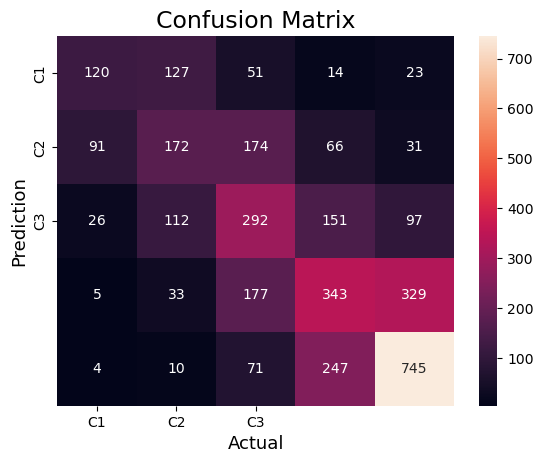

In [158]:
cm = confusion_matrix(y_test,prediction_linear)
print(cm)
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['C1', 'C2', 'C3'],
            yticklabels=['C1', 'C2', 'C3'])
plt.ylabel('Prediction', fontsize=13)
plt.xlabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17)
plt.show()

In [159]:
print('Exactitud: %.2f' % accuracy_score(y_test, prediction_linear))
print("Recall: {}".format(recall_score(y_test,prediction_linear, average="macro")))
print("Precisión: {}".format(precision_score(y_test,prediction_linear, average="macro")))
print("Puntuación F1: {}".format(f1_score(y_test,prediction_linear, average="macro")))

Exactitud: 0.48
Recall: 0.43788356693596586
Precisión: 0.4548610613081999
Puntuación F1: 0.44297480619670404


Hyperparameter tuning

In [160]:
param_grid = {'C': [0.1,1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001,0.0001], 
              'kernel': ['rbf','linear','poly','sigmoid']}  

#Easy grid search


In [161]:
best_score= -1000
best_parameters = []
i = 0
for c in param_grid['C']: 
    for g in param_grid['gamma']:
        for k in param_grid['kernel']:
            param = [c,g,k]
            #print('C: ', c, ' Gamma: ', g, ' Kernel: ', k)
            classifier = SVC(C=c, gamma=g, kernel=k)
            classifier.fit(x_val_tfidfVectorizer, y_val)
            score = classifier.score(x_val_tfidfVectorizer, y_val)
            if score> best_score: 
                best_score = score
                best_parameters = [c,g,k]
            print(1/64*i*100, '%'  )
            i+=1



print(best_score,best_parameters)

0.0 %
1.5625 %
3.125 %
4.6875 %
6.25 %
7.8125 %
9.375 %
10.9375 %
12.5 %
14.0625 %
15.625 %
17.1875 %
18.75 %
20.3125 %
21.875 %
23.4375 %
25.0 %
26.5625 %
28.125 %
29.6875 %
31.25 %
32.8125 %
34.375 %
35.9375 %
37.5 %
39.0625 %
40.625 %
42.1875 %
43.75 %
45.3125 %
46.875 %
48.4375 %
50.0 %
51.5625 %
53.125 %
54.6875 %
56.25 %
57.8125 %
59.375 %
60.9375 %
62.5 %
64.0625 %
65.625 %
67.1875 %
68.75 %
70.3125 %
71.875 %
73.4375 %
75.0 %
76.5625 %
78.125 %
79.6875 %
81.25 %
82.8125 %
84.375 %
85.9375 %
87.5 %
89.0625 %
90.625 %
92.1875 %
93.75 %
95.3125 %
96.875 %
98.4375 %
100.0 %
101.5625 %
103.125 %
104.6875 %
106.25 %
107.8125 %
109.375 %
110.9375 %
112.5 %
114.0625 %
115.625 %
117.1875 %
118.75 %
120.3125 %
121.875 %
123.4375 %
125.0 %
126.5625 %
128.125 %
129.6875 %
131.25 %
132.8125 %
134.375 %
135.9375 %
137.5 %
139.0625 %
140.625 %
142.1875 %
143.75 %
145.3125 %
146.875 %
148.4375 %
150.0 %
151.5625 %
153.125 %
154.6875 %
1.0 [1, 1, 'poly']


In [162]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
# Perform classification with SVM, kernel=linear
classifier_linear = SVC(kernel=best_parameters[2],C=best_parameters[0],gamma=best_parameters[1])
t0 = time()
classifier_linear.fit(x_train_tfidfVectorizer, y_train)
t1 = time()
prediction_linear = classifier_linear.predict(x_test_tfidfVectorizer)
t2 = time()
time_linear_train = t1-t0
time_linear_predict = t2-t1
# results
print("Training time: %fs; Prediction time: %fs" % (time_linear_train, time_linear_predict))
report = classification_report(y_test, prediction_linear, output_dict=True)
print('Class 1: ', report['1'])
print('Class 2: ', report['2'])
print('Class 3: ', report['3'])
print('Class 4: ', report['4'])
print('Class 5: ', report['5'])

Training time: 5.712381s; Prediction time: 3.830291s
Class 1:  {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 335.0}
Class 2:  {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 534.0}
Class 3:  {'precision': 0.2962962962962963, 'recall': 0.02359882005899705, 'f1-score': 0.04371584699453552, 'support': 678.0}
Class 4:  {'precision': 0.4666666666666667, 'recall': 0.007891770011273957, 'f1-score': 0.015521064301552107, 'support': 887.0}
Class 5:  {'precision': 0.31115630447414294, 'recall': 0.9944289693593314, 'f1-score': 0.47399867227262676, 'support': 1077.0}


c:\Users\ascas\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ascas\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ascas\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


K-fold grid Search

In [163]:
from sklearn.model_selection import KFold 
particiones = KFold(n_splits=3,shuffle=True,random_state=0)

In [164]:
svm = SVC()

In [165]:
best_model = GridSearchCV(svm, param_grid, cv=particiones,verbose = 3)

In [166]:
# Ajuste del modelo
best_model.fit(x_train_completo_tfidfVectorizer, y_train_completo)
#El grid search se demora 80 min -> Por este motivo se deja comentado de aqui se sacaron los mejores parametros

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV 1/3] END ........C=0.1, gamma=1, kernel=rbf;, score=0.303 total time=   5.8s
[CV 2/3] END ........C=0.1, gamma=1, kernel=rbf;, score=0.287 total time=   5.9s
[CV 3/3] END ........C=0.1, gamma=1, kernel=rbf;, score=0.303 total time=   5.8s
[CV 1/3] END .....C=0.1, gamma=1, kernel=linear;, score=0.307 total time=   5.1s
[CV 2/3] END .....C=0.1, gamma=1, kernel=linear;, score=0.287 total time=   5.3s
[CV 3/3] END .....C=0.1, gamma=1, kernel=linear;, score=0.308 total time=   5.4s
[CV 1/3] END .......C=0.1, gamma=1, kernel=poly;, score=0.303 total time=   6.1s
[CV 2/3] END .......C=0.1, gamma=1, kernel=poly;, score=0.287 total time=   6.0s
[CV 3/3] END .......C=0.1, gamma=1, kernel=poly;, score=0.303 total time=   5.6s
[CV 1/3] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.306 total time=   5.4s
[CV 2/3] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.287 total time=   4.9s
[CV 3/3] END ....C=0.1, gamma=1, kernel=sigmoi

GridSearchCV(cv=KFold(n_splits=3, random_state=0, shuffle=True),
             estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'linear', 'poly', 'sigmoid']},
             verbose=3)

In [167]:
best_model.best_params_ 

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}

In [168]:
svm_final = best_model.best_estimator_

In [169]:

svm_final = SVC(C=10,gamma=0.1,kernel='sigmoid')
# results
y_pred_train_completo =svm_final.fit(x_train_completo_tfidfVectorizer, y_train_completo)

y_pred_test_completo = prediction_linear = svm_final.predict(x_test_tfidfVectorizer)

report = classification_report(y_test, y_pred_test_completo, output_dict=True)
print('Class 1: ', report['1'])
print('Class 2: ', report['2'])
print('Class 3: ', report['3'])
print('Class 4: ', report['4'])
print('Class 5: ', report['5'])


Class 1:  {'precision': 0.5204918032786885, 'recall': 0.37910447761194027, 'f1-score': 0.4386873920552677, 'support': 335.0}
Class 2:  {'precision': 0.376984126984127, 'recall': 0.35580524344569286, 'f1-score': 0.3660886319845857, 'support': 534.0}
Class 3:  {'precision': 0.39814814814814814, 'recall': 0.443952802359882, 'f1-score': 0.4198047419804742, 'support': 678.0}
Class 4:  {'precision': 0.4315304948216341, 'recall': 0.4227733934611049, 'f1-score': 0.4271070615034169, 'support': 887.0}
Class 5:  {'precision': 0.6362038664323374, 'recall': 0.6722376973073352, 'f1-score': 0.65372460496614, 'support': 1077.0}


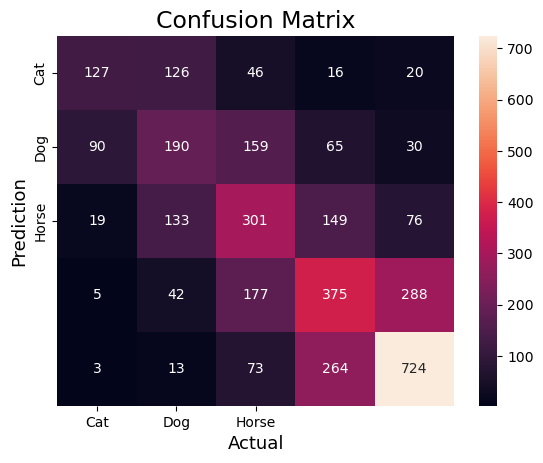

In [170]:
cm = confusion_matrix(y_test, y_pred_test_completo)
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Cat', 'Dog', 'Horse'],
            yticklabels=['Cat', 'Dog', 'Horse'])
plt.ylabel('Prediction', fontsize=13)
plt.xlabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17)
plt.show()

In [171]:
print('Exactitud: %.2f' % accuracy_score(y_test, prediction_linear))
print("Recall: {}".format(recall_score(y_test,prediction_linear, average="macro")))
print("Precisión: {}".format(precision_score(y_test,prediction_linear, average="macro")))
print("Puntuación F1: {}".format(f1_score(y_test,prediction_linear, average="macro")))

Exactitud: 0.49
Recall: 0.4547747228371911
Precisión: 0.472671687932987
Puntuación F1: 0.4610824864979769


## Naive bayes


In [172]:
from sklearn.naive_bayes import MultinomialNB

# Build a Gaussian Classifier
model = MultinomialNB()

# Model training
model.fit(x_train_complete_countVectorizer, y_train_completo)

# Predict Output
y_pred_test_completo = model.predict(x_test_countVectorizer)

print("Actual Value:", y_test)
print("Predicted Value:", y_pred_test_completo)

Actual Value: 1953    4
4576    5
2217    4
5386    4
4141    4
       ..
1903    4
3780    3
3867    4
7509    5
1524    5
Name: Class, Length: 3511, dtype: int64
Predicted Value: [4 5 5 ... 5 4 5]


In [173]:
print('Exactitud: %.2f' % accuracy_score(y_test, y_pred_test_completo))
print("Recall: {}".format(recall_score(y_test,y_pred_test_completo, average="macro")))
print("Precisión: {}".format(precision_score(y_test,y_pred_test_completo, average="macro")))
print("Puntuación F1: {}".format(f1_score(y_test,y_pred_test_completo, average="macro")))

Exactitud: 0.46
Recall: 0.4128124459711938
Precisión: 0.45957231809299903
Puntuación F1: 0.4198663121331073


In [174]:
from sklearn.naive_bayes import GaussianNB

# Build a Gaussian Classifier
model = GaussianNB()

# Model training
model.fit(x_train_complete_countVectorizer.toarray(), y_train_completo)

# Predict Output
y_pred_test_completo = model.predict(x_test_countVectorizer.toarray())

print("Actual Value:", y_test)
print("Predicted Value:", y_pred_test_completo)

Actual Value: 1953    4
4576    5
2217    4
5386    4
4141    4
       ..
1903    4
3780    3
3867    4
7509    5
1524    5
Name: Class, Length: 3511, dtype: int64
Predicted Value: [2 3 2 ... 3 4 5]


In [175]:
print('Exactitud: %.2f' % accuracy_score(y_test, y_pred_test_completo))
print("Recall: {}".format(recall_score(y_test,y_pred_test_completo, average="macro")))
print("Precisión: {}".format(precision_score(y_test,y_pred_test_completo, average="macro")))
print("Puntuación F1: {}".format(f1_score(y_test,y_pred_test_completo, average="macro")))

Exactitud: 0.27
Recall: 0.2816147138553696
Precisión: 0.28482235789984933
Puntuación F1: 0.2647643999131753


# Bibliografía


Recursos utilizados: 
https://medium.com/escueladeinteligenciaartificial/procesamiento-de-lenguaje-natural-stemming-y-lemmas-f5efd90dca8
https://neptune.ai/blog/vectorization-techniques-in-nlp-guide
https://gitlab.virtual.uniandes.edu.co/ISIS3301/practicas/blob/master/ProcesamientoTextos/Preparaci%C3%B3n_de_textos_estudiante.ipynb
